<a href="https://colab.research.google.com/github/A-Istrate/80629_Project/blob/main/ML_TPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import math
import copy
from random import seed
from random import random
import matplotlib.pyplot as plt  # import matplotlib for plotting and visualization
import matplotlib
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import os
from tensorflow.keras import layers
from sklearn.utils import class_weight

Checking our images

In [49]:
## images path
path = pathlib.Path(r"C:\Users\istra\Google Drive\Cours HEC\Maitrise\Semestre 2\Machine_Learning\TP GROUPE\book_covers")
image_count=len(list(path.glob('*/*.jpg')))
print(image_count)

33212


Checking a childrens book

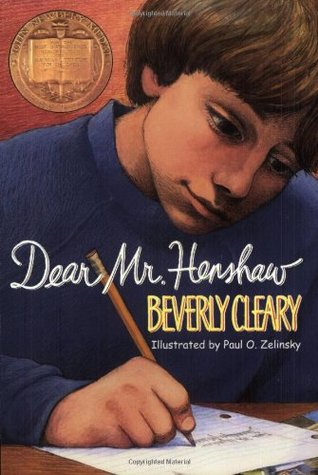

In [50]:
children = list(path.glob('Childrens/*'))
PIL.Image.open(str(children[12]))

Creating a dataset

In [63]:
batch_size =120
img_height = 150
img_width =100
train_img =tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=80629,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 33212 files belonging to 12 classes.
Using 26570 files for training.


In [64]:
valid_img =tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=80629,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 33212 files belonging to 12 classes.
Using 6642 files for validation.


Classes

In [65]:
class_names = train_img.class_names
print(class_names)
print(len(class_names))

['Childrens', 'Classics', 'Cultural', 'Fantasy', 'Historical', 'History', 'Horror', 'Mystery', 'Romance', 'Science Fiction', 'Sequential Art', 'Young Adult']
12


Visualisation

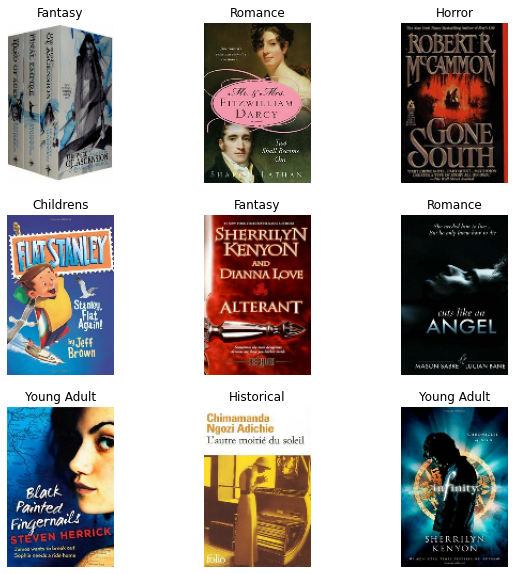

In [66]:
plt.figure(figsize=(10,10))
for images, labels in train_img.take(1):
  for i in range(9):
    ax:plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Size off the data

In [67]:
for image_batch, labels_batch in train_img:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(120, 150, 100, 3)
(120,)


Standardisation

In [81]:

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train_img.cla),
                                                 train_img)

AttributeError: 'PrefetchDataset' object has no attribute 'ref'

In [82]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

Setting the model

In [83]:
AUTOTUNE = tf.data.AUTOTUNE
train_img = train_img.cache().prefetch(buffer_size=AUTOTUNE)
valid_img = valid_img.cache().prefetch(buffer_size=AUTOTUNE)

num_classes=12

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [84]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Training

In [85]:
model.fit(
    train_img,
    validation_data=valid_img,
    epochs=30
)

Epoch 1/30
222/222 [==============================] - 98s 439ms/step - loss: 2.2654 - accuracy: 0.2265 - val_loss: 2.1315 - val_accuracy: 0.2796
Epoch 2/30
222/222 [==============================] - 100s 449ms/step - loss: 2.0940 - accuracy: 0.2880 - val_loss: 2.0212 - val_accuracy: 0.3214
Epoch 3/30
222/222 [==============================] - 102s 458ms/step - loss: 1.9633 - accuracy: 0.3363 - val_loss: 1.9676 - val_accuracy: 0.3418
Epoch 4/30
222/222 [==============================] - 101s 454ms/step - loss: 1.8250 - accuracy: 0.3879 - val_loss: 1.9770 - val_accuracy: 0.3464
Epoch 5/30
222/222 [==============================] - 100s 449ms/step - loss: 1.6695 - accuracy: 0.4438 - val_loss: 2.0483 - val_accuracy: 0.3433
Epoch 6/30
222/222 [==============================] - 102s 458ms/step - loss: 1.4795 - accuracy: 0.5102 - val_loss: 2.1963 - val_accuracy: 0.3413
Epoch 7/30
222/222 [==============================] - 102s 458ms/step - loss: 1.2922 - accuracy: 0.5721 - val_loss: 2.4487 - 

Saving our model after 3 iterations

In [60]:
model_3 = model

In [61]:
model_3.save("model_3.h5")

In [62]:
model.fit(
    train_img,
    validation_data=valid_img,
    epochs=3
)

Epoch 1/3
831/831 [==============================] - 61s 73ms/step - loss: 1.8822 - accuracy: 0.3626 - val_loss: 2.0093 - val_accuracy: 0.3285
Epoch 2/3
831/831 [==============================] - 61s 73ms/step - loss: 1.7663 - accuracy: 0.4032 - val_loss: 2.0494 - val_accuracy: 0.3257
Epoch 3/3
831/831 [==============================] - 60s 73ms/step - loss: 1.6368 - accuracy: 0.4496 - val_loss: 2.1708 - val_accuracy: 0.3168
